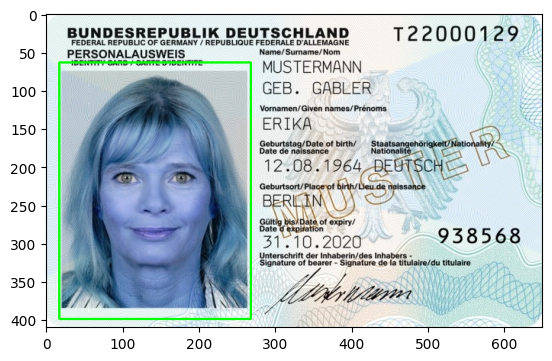

In [8]:
from retinaface import RetinaFace
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import sys , os
from pathlib import Path

BASE_DIR = Path(sys.path[0])
DATA_DIR = BASE_DIR / 'data'

def detect_face(image_path ,x_eps=0.35, y_eps=0.35):
    resp = RetinaFace.detect_faces(image_path)
    facial_area = resp.get('face_1').get('facial_area')
    x1,y1,x2,y2 = facial_area
    w = abs(x2 - x1)
    h = abs(y2 - y1)
    x1 -= int(x_eps*w)
    y1 -= int(y_eps*h)
    w = int(w*(1+2*x_eps))
    h = int(h*(1+2*y_eps))
    return (x1,y1,w,h)

def draw_dectected_face(image_path):
    """
    """
    image = cv.imread(image_path)
    x,y,w,h = detect_face(image_path)
    cv.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    plt.imshow(image)

draw_dectected_face('inputs/cards/card3.jpg')

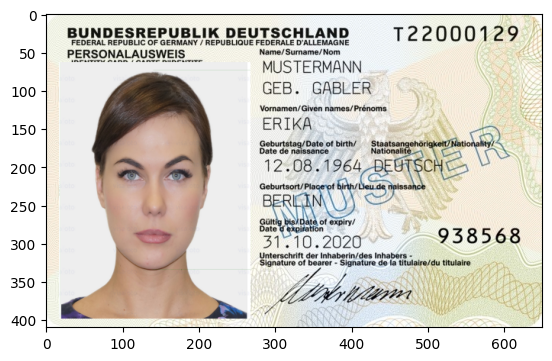

In [7]:

def replace_face(source_path,target_path, clone=False):
    """
        Detect and replace unique relevant face in source by target image
        return source with replaced face
    """
    source = cv.imread(source_path)
    target = cv.imread(target_path)
    x,y,w,h = detect_face(source_path)
    resized_target = cv.resize(target,(w,h),interpolation = cv.INTER_AREA)


    source[y:y+h,x:x+w] = resized_target[0:h,0:w]
    return source

source_path = 'inputs/cards/card3.jpg'
target_path = 'inputs/targets/target1.jpg'
replaced = replace_face(source_path,target_path)
plt.imshow(cv.cvtColor(replaced,cv.COLOR_RGB2BGR))